In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 6.5 MB/s eta 0:00:00


In [3]:
import numpy as np
import emoji
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import string
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix , roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df= pd.read_csv('/content/drive/MyDrive/DS_AND_ML/Cyberbullying Detection/cyberbullying_tweets.csv',encoding='latin')

In [5]:
df.shape

(47692, 2)

In [8]:
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [10]:
df['cyberbullying_type'].value_counts()/len(df)

cyberbullying_type
religion               0.167701
age                    0.167575
gender                 0.167177
ethnicity              0.166925
not_cyberbullying      0.166590
other_cyberbullying    0.164032
Name: count, dtype: float64

In [9]:
df.count()

tweet_text            47692
cyberbullying_type    47692
dtype: int64

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [11]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()


    text=emoji.replace_emoji(text, replace='')

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove @ mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text=text.lower()

    # Tokenize text
    word = word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    word = [word for word in word if word not in stop_words]
    exclude =string.punctuation
    word = [word for word in word if word not in exclude]

    lemmatizer = WordNetLemmatizer()
    tagged_words = pos_tag(word)
    lemmatized_words = []
    for word, tag in tagged_words:
        if tag.startswith('NN'):  # Noun
            pos = 'n'
        elif tag.startswith('VB'):  # Verb
            pos = 'v'
        elif tag.startswith('JJ'):  # Adjective
            pos = 'a'
        else:
            pos = 'n'  # Default to noun
        lemmatized_words.append(lemmatizer.lemmatize(word, pos))
    text = ' '.join(lemmatized_words)
    return text


In [13]:
df['tweet_text'] = df['tweet_text'].apply(preprocess_text)


In [14]:
df['tweet_text']

0                   word katandandre food crapilicious mkr
1        aussietv white mkr theblock imacelebrityau tod...
2                          classy whore red velvet cupcake
3        meh p thanks head concern another angry dude t...
4        isi account pretend kurdish account like islam...
                               ...                        
47687    black ppl arent expect anything depend anythin...
47688    turner withhold disappointment turner call cou...
47689    swear god dumb nigger bitch get bleach hair re...
47690    yea fuck rt youre nigger fuck unfollow fuck du...
47691    bro u get ta chill rt dog fuck kp dumb nigger ...
Name: tweet_text, Length: 47692, dtype: object

In [15]:
df.drop_duplicates("tweet_text", inplace=True)


In [16]:
df = df[df["cyberbullying_type"] != "other_cyberbullying"]
df['cyberbullying_type'].unique()

array(['not_cyberbullying', 'gender', 'religion', 'age', 'ethnicity'],
      dtype=object)

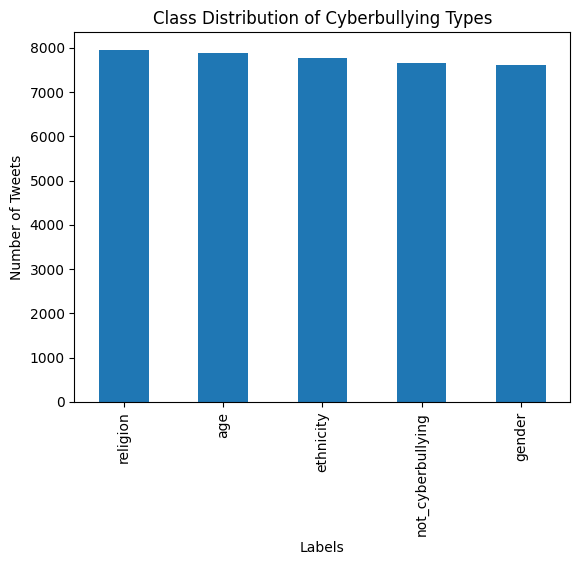

In [ ]:
class_counts = df['cyberbullying_type'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Cyberbullying Types')
plt.xlabel('Labels')
plt.ylabel('Number of Tweets')
plt.show()

In [21]:
encoder = LabelEncoder()
df['Label'] = encoder.fit_transform(df['cyberbullying_type'])

In [ ]:
df.head()

,tweet_text,cyberbullying_type,Label
0,word katandandre food crapilicious mkr,not_cyberbullying,3
1,aussietv white mkr theblock imacelebrityau tod...,not_cyberbullying,3
2,classy whore red velvet cupcake,not_cyberbullying,3
3,meh p thanks head concern another angry dude t...,not_cyberbullying,3
4,isi account pretend kurdish account like islam...,not_cyberbullying,3


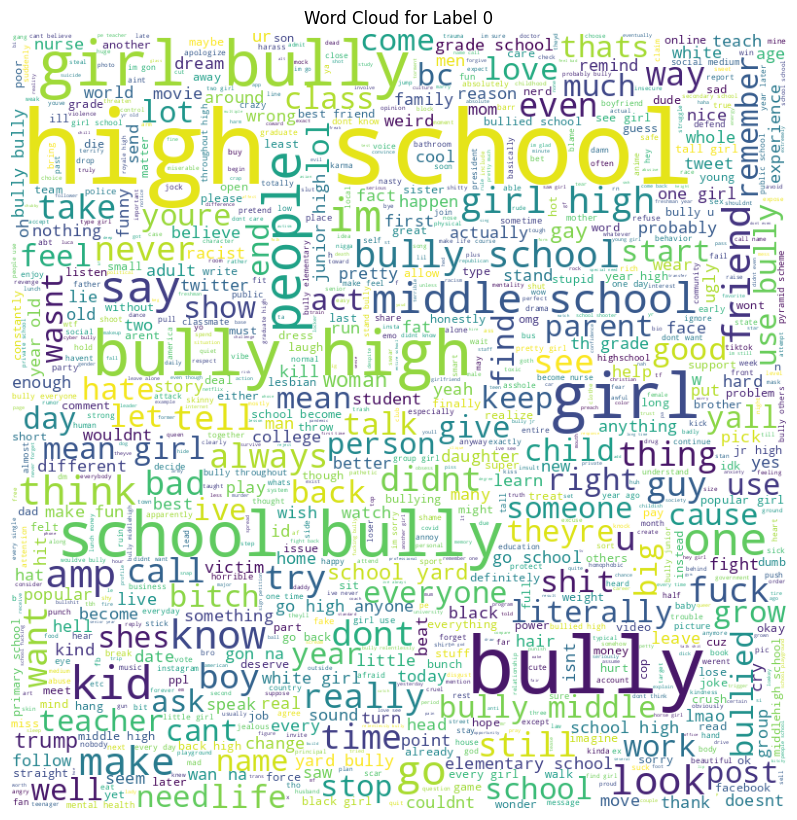

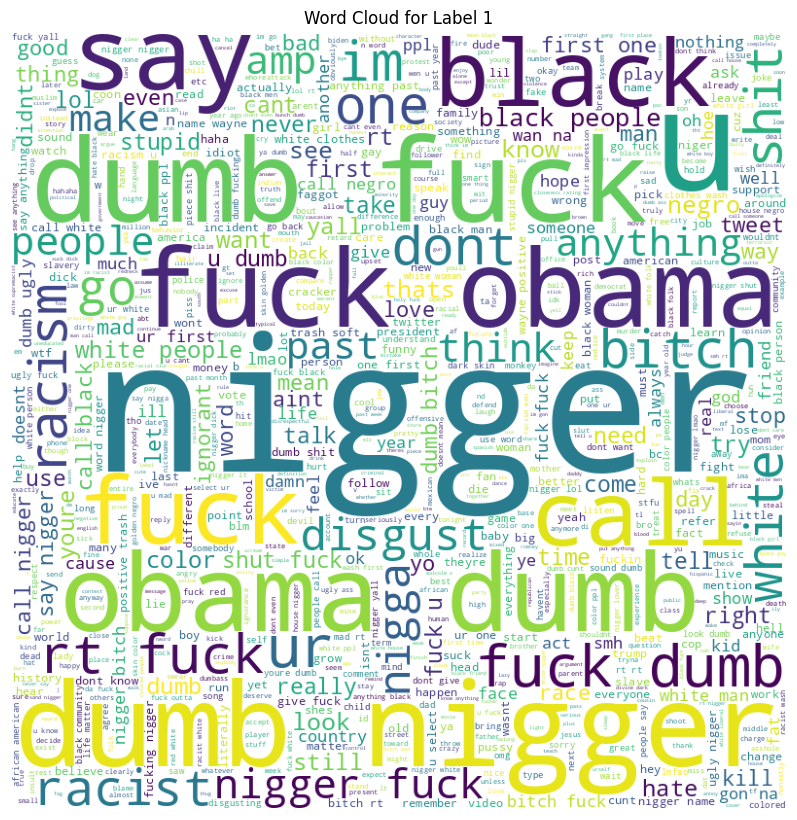

In [ ]:

text_label_0 = ' '.join(df[df['Label'] == 0]['tweet_text'].values)

# Combine all cleaned tweets for label 1 into a single string
text_label_1 = ' '.join(df[df['Label'] == 1]['tweet_text'].values)


# Generate word cloud for label 0
wordcloud_label_0 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_0)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_0)
plt.axis("off")
plt.title('Word Cloud for Label 0')
plt.tight_layout(pad=0)
plt.show()

wordcloud_label_1 = WordCloud(width=800, height=800, max_words=1000, background_color='white').generate(text_label_1)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_label_1)
plt.axis("off")
plt.title('Word Cloud for Label 1')
plt.tight_layout(pad=0)
plt.show()

In [22]:
X = df['tweet_text']
y=df['Label']

In [23]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
X_train.shape

(31115,)

In [24]:
tfidf = TfidfVectorizer()

In [25]:
tfidf_X = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [26]:
tfidf_X

<31115x34183 sparse matrix of type '<class 'numpy.float64'>'
	with 414836 stored elements in Compressed Sparse Row format>

In [27]:
tfidf_test.shape

(7779, 34183)

In [28]:
smote = SMOTE()

X_resampled,y_resampled = smote.fit_resample(tfidf_X,y_train)

In [29]:
X_resampled

<31915x34183 sparse matrix of type '<class 'numpy.float64'>'
	with 426252 stored elements in Compressed Sparse Row format>

In [ ]:
lr = LogisticRegression()

lr.fit(X_resampled,y_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(tfidf_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1602
           1       0.97      0.97      0.97      1569
           2       0.94      0.84      0.89      1545
           3       0.77      0.86      0.81      1485
           4       0.96      0.93      0.95      1578

    accuracy                           0.92      7779
   macro avg       0.92      0.92      0.92      7779
weighted avg       0.92      0.92      0.92      7779

[[1555    5    5   34    3]
 [   1 1527    8   28    5]
 [   3   11 1300  225    6]
 [  81   19   64 1273   48]
 [   5    7    7   86 1473]]


In [ ]:
svm = SVC()
svm.fit(X_resampled,y_resampled)


SVC()

In [ ]:
y_pred1= svm.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1602
           1       0.98      0.97      0.98      1569
           2       0.95      0.83      0.89      1545
           3       0.77      0.87      0.82      1485
           4       0.96      0.94      0.95      1578

    accuracy                           0.92      7779
   macro avg       0.92      0.92      0.92      7779
weighted avg       0.92      0.92      0.92      7779

[[1561    3    3   34    1]
 [   2 1529    6   28    4]
 [   6    7 1283  241    8]
 [  85   16   50 1290   44]
 [   4    8    4   86 1476]]


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_resampled,y_resampled)

RandomForestClassifier()

y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

In [ ]:
y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1602
           1       0.99      0.98      0.98      1569
           2       0.95      0.84      0.89      1545
           3       0.78      0.91      0.84      1485
           4       0.96      0.94      0.95      1578

    accuracy                           0.93      7779
   macro avg       0.93      0.93      0.93      7779
weighted avg       0.93      0.93      0.93      7779

[[1562    0    4   33    3]
 [   4 1534    6   21    4]
 [   2    3 1296  239    5]
 [  26   11   49 1354   45]
 [   4    5    6   81 1482]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_resampled,y_resampled)

KNeighborsClassifier()

In [ ]:
y_pred1= rf.predict(tfidf_test)
cm = confusion_matrix(y_test,y_pred1)
print(classification_report(y_test,y_pred1))
print(cm)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1602
           1       0.99      0.98      0.98      1569
           2       0.95      0.84      0.89      1545
           3       0.78      0.91      0.84      1485
           4       0.96      0.94      0.95      1578

    accuracy                           0.93      7779
   macro avg       0.93      0.93      0.93      7779
weighted avg       0.93      0.93      0.93      7779

[[1562    0    4   33    3]
 [   4 1534    6   21    4]
 [   2    3 1296  239    5]
 [  26   11   49 1354   45]
 [   4    5    6   81 1482]]


In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



In [17]:
# Preprocess the data
tokenizer = Tokenizer(num_words=30000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet_text'])
sequences = tokenizer.texts_to_sequences(df['tweet_text'])


In [18]:
from keras.preprocessing.text import Tokenizer
import pickle

In [19]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
# Pad the sequences
padded_sequences = pad_sequences(sequences, maxlen=120, padding='post', truncating='post')


In [33]:
# Encode the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(df['cyberbullying_type'])


In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)


In [35]:
# Convert the labels to categorical
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)


In [36]:
# Build a more sophisticated LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=30000, output_dim=128, input_length=120),
    tf.keras.layers.SpatialDropout1D(0.2),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 128)          3840000   
                                                                 
 spatial_dropout1d (Spatial  (None, 120, 128)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 120, 256)          263168    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 120, 128)          164352    
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                41216     
 onal)                                                  

In [37]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])



In [38]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10
487/487 [==============================] - 62s 90ms/step - loss: 0.6026 - accuracy: 0.7635 - val_loss: 0.2265 - val_accuracy: 0.9245
Epoch 2/10
487/487 [==============================] - 19s 38ms/step - loss: 0.2080 - accuracy: 0.9409 - val_loss: 0.2046 - val_accuracy: 0.9293
Epoch 3/10
487/487 [==============================] - 20s 41ms/step - loss: 0.1353 - accuracy: 0.9626 - val_loss: 0.2369 - val_accuracy: 0.9203
Epoch 4/10
487/487 [==============================] - 20s 41ms/step - loss: 0.0965 - accuracy: 0.9741 - val_loss: 0.2703 - val_accuracy: 0.9227
Epoch 5/10
487/487 [==============================] - 18s 36ms/step - loss: 0.0789 - accuracy: 0.9779 - val_loss: 0.3114 - val_accuracy: 0.9230
Epoch 6/10
487/487 [==============================] - 19s 39ms/step - loss: 0.0573 - accuracy: 0.9838 - val_loss: 0.3071 - val_accuracy: 0.9186
Epoch 7/10
487/487 [==============================] - 19s 39ms/step - loss: 0.0533 - accuracy: 0.9851 - val_loss: 0.3791 - val_accuracy:

In [39]:

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

244/244 [==============================] - 3s 14ms/step - loss: 0.5621 - accuracy: 0.9055
Test Accuracy: 0.91


In [42]:
# Save the model architecture to JSON
model_json = model.to_json()
with open("lstm_model.json", "w") as json_file:
    json_file.write(model_json)


In [43]:
# Save the model weights
model.save_weights("lstm_model_weights.h5")


In [44]:
from keras.models import model_from_json

# Load the model architecture from JSON
with open('lstm_model.json', 'r') as json_file:
    loaded_model_json = json_file.read()
loaded_model = model_from_json(loaded_model_json)


In [45]:
# Load the model weights
loaded_model.load_weights("lstm_model_weights.h5")


In [46]:
loaded_model.compile(optimizer='adam', loss='mse')


244/244 [==============================] - 75s 295ms/step


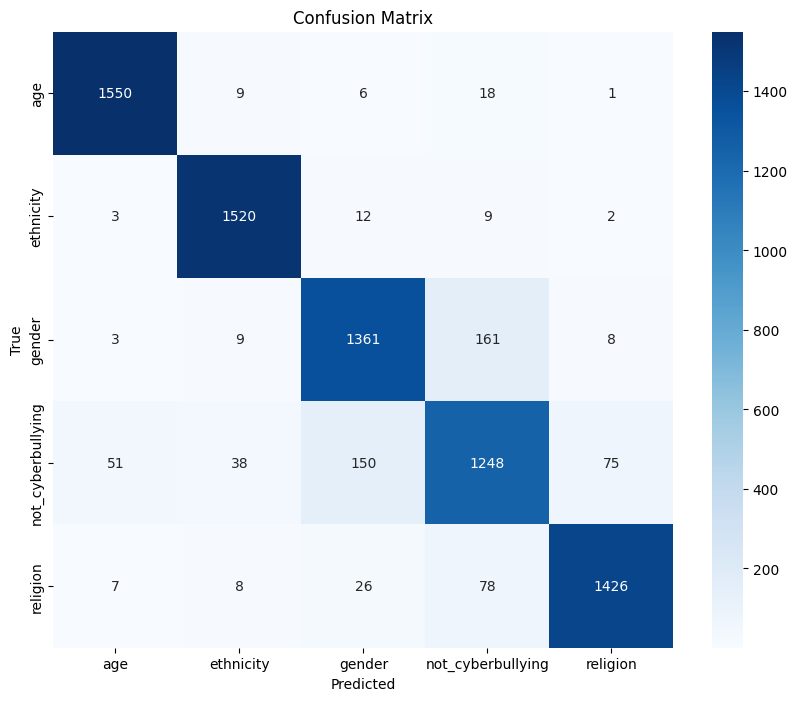

In [ ]:

# Generate predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

                   precision    recall  f1-score   support

              age       0.96      0.98      0.97      1584
        ethnicity       0.96      0.98      0.97      1546
           gender       0.88      0.88      0.88      1542
not_cyberbullying       0.82      0.80      0.81      1562
         religion       0.94      0.92      0.93      1545

         accuracy                           0.91      7779
        macro avg       0.91      0.91      0.91      7779
     weighted avg       0.91      0.91      0.91      7779



In [ ]:


# Save the model
model.save('cyberbullying_lstm_model_improved.h5')

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:
# Sample a smaller subset of the data
sample_size = 500  # You can adjust this number as needed
data_sample = df.sample(n=sample_size, random_state=42)


In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
data_sample['Label'] = label_encoder.fit_transform(data_sample['cyberbullying_type'])




In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_sample['tweet_text'], data_sample['Label'], test_size=0.2, random_state=42)


In [ ]:
# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))



All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Tokenize the data
max_length = 128
train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True, max_length=max_length)
test_encodings = tokenizer(X_test.tolist(), truncation=True, padding=True, max_length=max_length)



In [ ]:
# Convert encodings to TensorFlow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    y_train.tolist()
)).shuffle(len(X_train)).batch(16)  # Smaller batch size

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    y_test.tolist()
)).batch(16)



In [ ]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset, epochs=3, validation_data=test_dataset, batch_size=64)


Epoch 1/5
25/25 [==============================] - 702s 28s/step - loss: 1.2190 - accuracy: 0.5975 - val_loss: 0.8799 - val_accuracy: 0.7200
Epoch 2/5
25/25 [==============================] - 652s 26s/step - loss: 0.5946 - accuracy: 0.8875 - val_loss: 0.5212 - val_accuracy: 0.8500
Epoch 3/5
25/25 [==============================] - 650s 26s/step - loss: 0.2764 - accuracy: 0.9475 - val_loss: 0.4873 - val_accuracy: 0.8600
Epoch 4/5
25/25 [==============================] - 657s 26s/step - loss: 0.1398 - accuracy: 0.9775 - val_loss: 0.4317 - val_accuracy: 0.8600
Epoch 5/5
25/25 [==============================] - 648s 26s/step - loss: 0.0764 - accuracy: 0.9925 - val_loss: 0.4246 - val_accuracy: 0.8800


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_dataset)
print(f'Test Accuracy: {accuracy:.2f}')

7/7 [==============================] - 18s 3s/step - loss: 0.4246 - accuracy: 0.8800
Test Accuracy: 0.88


In [ ]:
# Generate predictions
y_pred = model.predict(test_dataset).logits
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_df['Label'].values

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

7/7 [==============================] - 32s 2s/step


ValueError: Found input variables with inconsistent numbers of samples: [7779, 100]

In [ ]:
# Classification report
print(classification_report(y_true, y_pred_classes, target_names=label_encoder.classes_))

In [ ]:

# Save the model
model.save_pretrained('cyberbullying_bert_model')
tokenizer.save_pretrained('cyberbullying_bert_tokenizer')
